In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import statsmodels.api as sm
%matplotlib inline

In [0]:
import seaborn as sns
import pickle

In [0]:
df = pd.read_csv('/content/P12-Churn-Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
df.set_index('RowNumber',inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
df = pd.get_dummies(df,drop_first=True,columns=['Gender'])
df = pd.get_dummies(df,columns=['Geography'],drop_first=True)
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [0]:
X = df.drop(['Exited','CustomerId','Surname'],axis=1)
y = df[['Exited']]

In [0]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,42,8,159660.80,3,1,0,113931.57,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [0]:
y.head()

,Exited
RowNumber,
1,1
2,0
3,1
4,0
5,0


In [0]:
logistic_model = sm.OLS(y,X).fit()

In [0]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              434.0
Date:                Mon, 03 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:12:51   Log-Likelihood:                         -4280.5
No. Observations:               10000   AIC:                                      8583.
Df Residuals:                    9989   BIC:                                      8662.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0002    2.6e-05     -6.197      0.000      -0.000      -0.000
Age                   0.0107      0.000     33.208      0.000       0.010       0.011
Tenure               -0.0025      0.001     -1.961      0.050      -0.005   -9.44e-07
Balance            2.778e-07   6.71e-08      4.138      0.000    1.46e-07    4.09e-07
NumOfProducts        -0.0213      0.006     -3.363      0.001      -0.034      -0.009
HasCrCard            -0.0085      0.008     -1.055      0.292      -0.024       0.007
IsActiveMember       -0.1422      0.007    -19.071      0.000      -0.157      -0.128
EstimatedSalary    3.923e-08   6.34e-08      0.618      0.536   -8.51e-08    1.64e-07
Gender_Male          -0.0769      0.007    -10.388      0.000      -0.091      -0.062
Geography_Germany     0.1268      0.010     12.793      0.000       0.107       0.146
Geography_Spain       0.0024      0.009      0.262      0.793      -0.015       0.020
==============================================================================
Omnibus:                     1493.533   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2272.708
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       3.214   Cond. No.                     4.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
X1 = X.drop('Geography_Spain',axis=1)
log_model1 = sm.OLS(y,X1).fit()
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              477.5
Date:                Mon, 03 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:12:52   Log-Likelihood:                         -4280.6
No. Observations:               10000   AIC:                                      8581.
Df Residuals:                    9990   BIC:                                      8653.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0002   2.59e-05     -6.199      0.000      -0.000      -0.000
Age                   0.0108      0.000     33.266      0.000       0.010       0.011
Tenure               -0.0025      0.001     -1.956      0.050      -0.005    4.76e-06
Balance            2.781e-07   6.71e-08      4.143      0.000    1.47e-07     4.1e-07
NumOfProducts        -0.0213      0.006     -3.356      0.001      -0.034      -0.009
HasCrCard            -0.0085      0.008     -1.054      0.292      -0.024       0.007
IsActiveMember       -0.1422      0.007    -19.070      0.000      -0.157      -0.128
EstimatedSalary    3.943e-08   6.34e-08      0.621      0.534   -8.49e-08    1.64e-07
Gender_Male          -0.0769      0.007    -10.385      0.000      -0.091      -0.062
Geography_Germany     0.1260      0.009     13.359      0.000       0.108       0.145
==============================================================================
Omnibus:                     1493.571   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2272.768
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       3.214   Cond. No.                     3.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
X2 = X1.drop('EstimatedSalary',axis=1)
log_model2 = sm.OLS(y,X2).fit()
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              530.5
Date:                Mon, 03 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:12:52   Log-Likelihood:                         -4280.8
No. Observations:               10000   AIC:                                      8580.
Df Residuals:                    9991   BIC:                                      8644.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0002   2.53e-05     -6.208      0.000      -0.000      -0.000
Age                   0.0108      0.000     33.433      0.000       0.010       0.011
Tenure               -0.0024      0.001     -1.930      0.054      -0.005    3.75e-05
Balance            2.806e-07    6.7e-08      4.188      0.000    1.49e-07    4.12e-07
NumOfProducts        -0.0209      0.006     -3.313      0.001      -0.033      -0.009
HasCrCard            -0.0083      0.008     -1.039      0.299      -0.024       0.007
IsActiveMember       -0.1422      0.007    -19.070      0.000      -0.157      -0.128
Gender_Male          -0.0768      0.007    -10.376      0.000      -0.091      -0.062
Geography_Germany     0.1260      0.009     13.356      0.000       0.107       0.144
==============================================================================
Omnibus:                     1493.130   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2271.808
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       3.214   Cond. No.                     2.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
X3 = X2.drop('HasCrCard',axis=1)
log_model3 = sm.OLS(y,X3).fit()
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              596.7
Date:                Mon, 03 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:12:52   Log-Likelihood:                         -4281.3
No. Observations:               10000   AIC:                                      8579.
Df Residuals:                    9992   BIC:                                      8636.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0002   2.48e-05     -6.556      0.000      -0.000      -0.000
Age                   0.0107      0.000     33.449      0.000       0.010       0.011
Tenure               -0.0025      0.001     -1.995      0.046      -0.005    -4.4e-05
Balance             2.79e-07    6.7e-08      4.166      0.000    1.48e-07     4.1e-07
NumOfProducts        -0.0214      0.006     -3.390      0.001      -0.034      -0.009
IsActiveMember       -0.1422      0.007    -19.071      0.000      -0.157      -0.128
Gender_Male          -0.0770      0.007    -10.413      0.000      -0.092      -0.063
Geography_Germany     0.1259      0.009     13.347      0.000       0.107       0.144
==============================================================================
Omnibus:                     1494.960   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2275.646
Skew:                           1.164   Prob(JB):                         0.00
Kurtosis:                       3.215   Cond. No.                     2.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

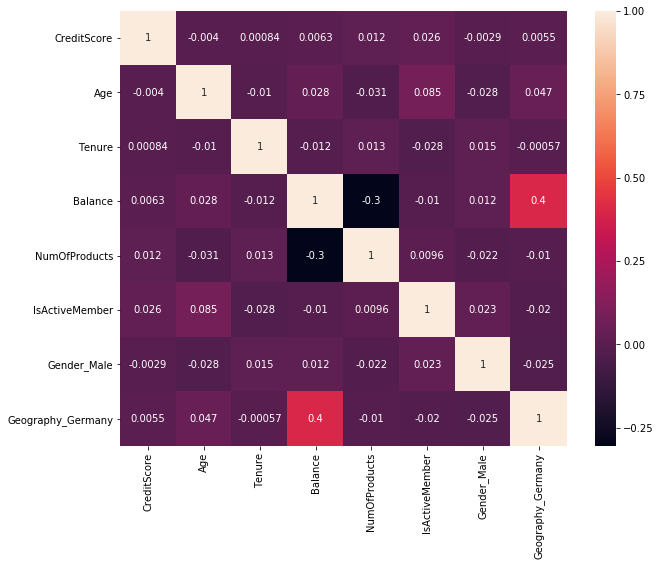

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(X3.corr(),annot=True)

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1 = pd.DataFrame()
vif1['VIF Factor'] = [variance_inflation_factor(X3.values,i) for i in range(X3.shape[1])]
vif1["features"] = X3.columns
vif1

,VIF Factor,features
0,19.288232,CreditScore
1,12.148812,Age
2,3.850109,Tenure
3,3.168556,Balance
4,7.717170,NumOfProducts
5,2.075576,IsActiveMember
6,2.165243,Gender_Male
7,1.618285,Geography_Germany


In [0]:
#  transformation
X3['log_balance'] = np.log10(X3['Balance'] + 1)
X3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Gender_Male,Geography_Germany,log_balance
RowNumber,,,,,,,,,
1,619,42,2,0.00,1,1,0,0,0.000000
2,608,41,1,83807.86,1,1,0,0,4.923290
3,502,42,8,159660.80,3,0,0,0,5.203201
4,699,39,1,0.00,2,0,0,0,0.000000
5,850,43,2,125510.82,1,1,0,0,5.098685


In [0]:
X4 = X3.drop('Balance',axis=1)
log_model4 = sm.OLS(y,X4).fit()
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              596.1
Date:                Mon, 03 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:12:54   Log-Likelihood:                         -4282.8
No. Observations:               10000   AIC:                                      8582.
Df Residuals:                    9992   BIC:                                      8639.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0002    2.5e-05     -6.502      0.000      -0.000      -0.000
Age                   0.0107      0.000     33.367      0.000       0.010       0.011
Tenure               -0.0025      0.001     -1.988      0.047      -0.005   -3.56e-05
NumOfProducts        -0.0213      0.006     -3.348      0.001      -0.034      -0.009
IsActiveMember       -0.1424      0.007    -19.091      0.000      -0.157      -0.128
Gender_Male          -0.0768      0.007    -10.381      0.000      -0.091      -0.062
Geography_Germany     0.1257      0.010     13.053      0.000       0.107       0.145
log_balance           0.0067      0.002      3.788      0.000       0.003       0.010
==============================================================================
Omnibus:                     1497.550   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2281.007
Skew:                           1.165   Prob(JB):                         0.00
Kurtosis:                       3.217   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
vif2 = pd.DataFrame()
vif2['VIF Factor'] = [variance_inflation_factor(X4.values,i) for i in range(X4.shape[1])]
vif2["features"] = X4.columns
vif2

,VIF Factor,features
0,19.663493,CreditScore
1,12.193969,Age
2,3.850740,Tenure
3,7.849591,NumOfProducts
4,2.076225,IsActiveMember
5,2.164473,Gender_Male
6,1.685920,Geography_Germany
7,3.674768,log_balance


In [0]:
# creating derived variable
X4['Wealth_accumulation'] = X4['log_balance']/X4['Age']
X4.head()

,CreditScore,Age,Tenure,NumOfProducts,IsActiveMember,Gender_Male,Geography_Germany,log_balance,Wealth_accumulation
RowNumber,,,,,,,,,
1,619,42,2,1,1,0,0,0.000000,0.000000
2,608,41,1,1,1,0,0,4.923290,0.120080
3,502,42,8,3,0,0,0,5.203201,0.123886
4,699,39,1,2,0,0,0,0.000000,0.000000
5,850,43,2,1,1,0,0,5.098685,0.118574


In [0]:
linear_model5 = sm.OLS(y,X4).fit()
linear_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.326
Model:                            OLS   Adj. R-squared (uncentered):              0.325
Method:                 Least Squares   F-statistic:                              536.3
Date:                Mon, 03 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:12:55   Log-Likelihood:                         -4263.3
No. Observations:               10000   AIC:                                      8545.
Df Residuals:                    9991   BIC:                                      8609.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
CreditScore          -8.33e-05   2.81e-05     -2.969      0.003      -0.000   -2.83e-05
Age                     0.0089      0.000     20.453      0.000       0.008       0.010
Tenure                 -0.0019      0.001     -1.531      0.126      -0.004       0.001
NumOfProducts          -0.0159      0.006     -2.490      0.013      -0.028      -0.003
IsActiveMember         -0.1385      0.007    -18.548      0.000      -0.153      -0.124
Gender_Male            -0.0744      0.007    -10.065      0.000      -0.089      -0.060
Geography_Germany       0.1227      0.010     12.751      0.000       0.104       0.142
log_balance             0.0383      0.005      7.148      0.000       0.028       0.049
Wealth_accumulation    -1.1038      0.177     -6.249      0.000      -1.450      -0.758
==============================================================================
Omnibus:                     1493.493   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2269.079
Skew:                           1.160   Prob(JB):                         0.00
Kurtosis:                       3.246   Cond. No.                     3.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
vif3 = pd.DataFrame()
vif3['VIF Factor'] = [variance_inflation_factor(X4.values,i) for i in range(X4.shape[1])]
vif3["features"] = X4.columns
vif3

,VIF Factor,features
0,24.762512,CreditScore
1,22.391145,Age
2,3.871306,Tenure
3,7.991915,NumOfProducts
4,2.090418,IsActiveMember
5,2.170239,Gender_Male
6,1.690100,Geography_Germany
7,34.201270,log_balance
8,29.476712,Wealth_accumulation


In [0]:
X5 = X4.drop(['Tenure','Wealth_accumulation'],axis=1)
linear_model6 = sm.OLS(y,X5).fit()
linear_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.322
Method:                 Least Squares   F-statistic:                              680.5
Date:                Mon, 03 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:12:55   Log-Likelihood:                         -4284.8
No. Observations:               10000   AIC:                                      8584.
Df Residuals:                    9993   BIC:                                      8634.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0002   2.43e-05     -7.186      0.000      -0.000      -0.000
Age                   0.0107      0.000     33.318      0.000       0.010       0.011
NumOfProducts        -0.0224      0.006     -3.543      0.000      -0.035      -0.010
IsActiveMember       -0.1421      0.007    -19.058      0.000      -0.157      -0.128
Gender_Male          -0.0775      0.007    -10.479      0.000      -0.092      -0.063
Geography_Germany     0.1259      0.010     13.069      0.000       0.107       0.145
log_balance           0.0065      0.002      3.711      0.000       0.003       0.010
==============================================================================
Omnibus:                     1500.711   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2287.785
Skew:                           1.167   Prob(JB):                         0.00
Kurtosis:                       3.217   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
vif4 = pd.DataFrame()
vif4['VIF Factor'] = [variance_inflation_factor(X5.values,i) for i in range(X5.shape[1])]
vif4["features"] = X5.columns
vif4

,VIF Factor,features
0,18.535879,CreditScore
1,12.096943,Age
2,7.784251,NumOfProducts
3,2.075647,IsActiveMember
4,2.160142,Gender_Male
5,1.685782,Geography_Germany
6,3.668920,log_balance


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X5,y,test_size=0.3,random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression()

In [0]:
model = lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
pickle.dump(model,open('model.pickle','wb'))

In [0]:
model = pickle.load(open('model.pickle','rb'))

In [0]:
pred = model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [0]:
print(classification_report(pred,y_test))
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2789
           1       0.21      0.61      0.31       211

    accuracy                           0.81      3000
   macro avg       0.59      0.71      0.60      3000
weighted avg       0.91      0.81      0.85      3000

0.8076666666666666
[[2295  494]
 [  83  128]]


In [0]:
with open("model_summary.txt",'w') as f:
  f.write(str(model_summary))

In [0]:
y_test.head()

,Exited
RowNumber,
6677,0
6422,0
9835,1
8493,0
9983,1


In [0]:
output = pd.DataFrame({
  'actual :': y_test['Exited'],
  'prediction': pred
})
output.head()

,actual :,prediction
RowNumber,,
6677,0,0
6422,0,0
9835,1,0
8493,0,0
9983,1,1


In [0]:
output.to_csv('output.csv')

In [0]:
df2.set_index('RowNumber',inplace=True)
df2.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
10001,15798485,Copley,565,France,Male,31,1,0.00,1,0,1,20443.08,0
10002,15588959,T'ang,569,France,Male,34,4,0.00,1,0,1,4045.90,0
10003,15624896,Ku,669,France,Female,20,7,0.00,2,1,0,128838.67,0
10004,15639629,McConnan,694,France,Male,39,4,173255.48,1,1,1,81293.10,0
10005,15638852,Ts'ui,504,Spain,Male,28,10,109291.36,1,1,1,187593.15,0


In [0]:
df2 = pd.get_dummies(df2,drop_first=True,columns=['Gender'])
df2= pd.get_dummies(df2,columns=['Geography'],drop_first=True)
df2.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,
10001,15798485,Copley,565,31,1,0.00,1,0,1,20443.08,0,1,0,0
10002,15588959,T'ang,569,34,4,0.00,1,0,1,4045.90,0,1,0,0
10003,15624896,Ku,669,20,7,0.00,2,1,0,128838.67,0,0,0,0
10004,15639629,McConnan,694,39,4,173255.48,1,1,1,81293.10,0,1,0,0
10005,15638852,Ts'ui,504,28,10,109291.36,1,1,1,187593.15,0,1,0,1


In [0]:
df2['log_balance'] = np.log10(df2['Balance'] + 1)
df2.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,log_balance
RowNumber,,,,,,,,,,,,,,,
10001,15798485,Copley,565,31,1,0.00,1,0,1,20443.08,0,1,0,0,0.000000
10002,15588959,T'ang,569,34,4,0.00,1,0,1,4045.90,0,1,0,0,0.000000
10003,15624896,Ku,669,20,7,0.00,2,1,0,128838.67,0,0,0,0,0.000000
10004,15639629,McConnan,694,39,4,173255.48,1,1,1,81293.10,0,1,0,0,5.238689
10005,15638852,Ts'ui,504,28,10,109291.36,1,1,1,187593.15,0,1,0,1,5.038590


In [0]:
test_data_X = df2[['CreditScore', 'Age', 'NumOfProducts', 'IsActiveMember', 'Gender_Male',
       'Geography_Germany', 'log_balance']]
test_data_y = df2[['Exited']]

In [0]:
model_test = model.predict(test_data_X)

In [0]:
print(classification_report(model_test,test_data_y))
print(accuracy_score(model_test,test_data_y))
print(confusion_matrix(model_test,test_data_y))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       928
           1       0.17      0.61      0.27        72

    accuracy                           0.76      1000
   macro avg       0.57      0.69      0.56      1000
weighted avg       0.91      0.76      0.81      1000

0.756
[[712 216]
 [ 28  44]]


In [0]:
# y_test

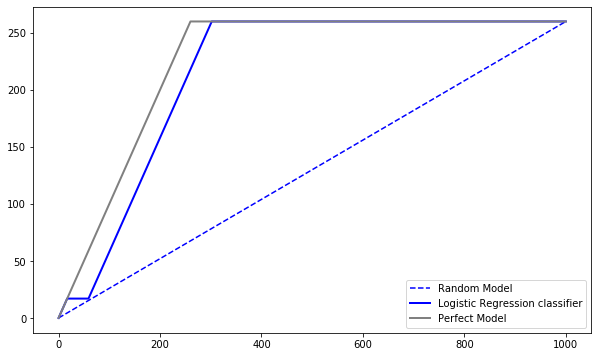

In [0]:
# test data 


# length of the test data 
total = len(y_test) 
  
# Counting '1' labels in test data 
one_count = np.sum(y_test) 
  
# counting '0' lables in test data  
zero_count = total - one_count 
  
plt.figure(figsize = (10, 6)) 
  
# x-axis ranges from 0 to total people contacted  
# y-axis ranges from 0 to the total positive outcomes. 
  
plt.plot([0, total], [0, one_count], c = 'b',  
         linestyle = '--', label = 'Random Model') 

lm = [y for _, y in sorted(zip(pred, y_test), reverse = True)] 
x = np.arange(0, total + 1)
y = np.append([0], np.cumsum(lm)) 
plt.plot(x, y, c = 'b', label = 'Logistic Regression classifier', linewidth = 2) 


plt.plot([0, one_count, total], [0, one_count, one_count], 
		c = 'grey', linewidth = 2, label = 'Perfect Model') 

plt.legend() 

In [0]:
odds_df = pd.DataFrame({
    "coeff: ": linear_model6.params
})
odds_df

,coeff:
CreditScore,-0.000175
Age,0.010681
NumOfProducts,-0.022438
IsActiveMember,-0.142138
Gender_Male,-0.077458
Geography_Germany,0.125866
log_balance,0.006527


In [0]:
odds_df['odds_value'] = np.exp([i for i in linear_model6.params])
odds_df['p_value'] = linear_model6.pvalues

In [0]:
odds_df

,coeff:,odds_value,p_value
CreditScore,-0.000175,0.999825,7.148756e-13
Age,0.010681,1.010738,6.733582e-231
NumOfProducts,-0.022438,0.977812,3.966770e-04
IsActiveMember,-0.142138,0.867501,1.438363e-79
Gender_Male,-0.077458,0.925465,1.469244e-25
Geography_Germany,0.125866,1.134130,1.021933e-38
log_balance,0.006527,1.006549,2.074074e-04


In [0]:
odds_df.to_csv('churn_model_report.csv')